In [1]:
from Collabrative_Filtering import collabrative_filtering
from helper import write_submission, csv_parse, submit_results
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ## Split the dataset to train data and test data
# total_dataset = pd.read_csv('./data/data_train_post.csv')
# num_col = (0.75 * total_dataset.groupby('col_id')['row_id'].count()).astype(int)

# train_dataset = pd.DataFrame(columns=['Id', 'Prediction', 'row_id', 'col_id'])
# test_dataset = pd.DataFrame(columns=['Id', 'Prediction', 'row_id', 'col_id'])
# for i in range(1, 1001):
#     current_rows = total_dataset.loc[total_dataset['col_id'] == i]
#     train_dataset = train_dataset.append(current_rows.iloc[0:num_col.iloc[i-1]])
#     train_dataset = train_dataset.append(current_rows.iloc[ -1 ])
#     test_dataset = test_dataset.append(current_rows.iloc[num_col.iloc[i-1]: -1 ])
#     if i % 100 ==0:
#         print(i)

        
# print(train_dataset.groupby('col_id')['row_id'].count())

# # nrows = total_dataset.shape[0]
# # train_dataset = total_dataset.iloc[0:int(nrows*0.7)]
# # train_dataset = train_dataset.append(total_dataset.iloc[-1])
# # print(train_dataset.iloc[-1])
# train_dataset.to_csv('./data/bootstrap_train.csv', index=False)

# # test_dataset = total_dataset.loc[int(nrows*0.7):(nrows-1)]
# test_dataset.to_csv('./data/bootstrap_test.csv', index=False)

In [26]:
alpha = 0.05
beta = 0.02
epsilon = 1e-3
max_iter = 5000
sample = 1

training_dataset = pd.read_csv('./data/bootstrap_train.csv')
cf = collabrative_filtering(training_dataset, k=50)

final_pred, traces = cf.train(alpha, beta, max_iter, epsilon, sample)

Initial Loss: 3.71946
************************************************************
Iteration: 100, Misfit: 3.63286, Sample: 1
Average time per iteration: 0.2703
************************************************************
Iteration: 200, Misfit: 3.55468, Sample: 1
Average time per iteration: 0.2691
************************************************************
Iteration: 300, Misfit: 3.48078, Sample: 1
Average time per iteration: 0.2694
************************************************************
Iteration: 400, Misfit: 3.40730, Sample: 1
Average time per iteration: 0.2695
************************************************************
Iteration: 500, Misfit: 3.33538, Sample: 1
Average time per iteration: 0.2698
************************************************************
Iteration: 600, Misfit: 3.27128, Sample: 1
Average time per iteration: 0.2792
************************************************************
Iteration: 700, Misfit: 3.20598, Sample: 1
Average time per iteration: 0.2803
*****

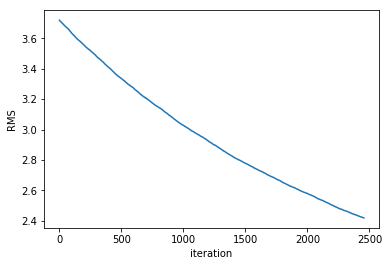

RMS= 2.73999


In [27]:
plt.plot(traces[:, 0], traces[:,1])
plt.xlabel('iteration')
plt.ylabel('RMS')
plt.show()

test_data = pd.read_csv('./data/bootstrap_test.csv')
row_ids = test_data['row_id']
col_ids = test_data['col_id']
test_result = final_pred[row_ids-1, col_ids-1]
err = test_data['Prediction'].values-test_result
rms = np.sqrt(np.sum(np.power(err[0], 2))/test_result.shape[1])

print('RMS= %.5f' % rms)

In [ ]:
# ## Submit the result 
write_submission(final_pred)